In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
bird= sns.load_dataset("penguins")

In [4]:
bird.tail()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female
343,Gentoo,Biscoe,49.9,16.1,213.0,5400.0,Male


**Data set visualisation based on the above code plots the data points organised by “island” and colour-coded by “species”.
With one glance we can infer that “Gentoo” species are only present on the island “Biscoe”. Gentoo species is heavier and has a longer flipper length that other species. “Adelie” species is available on all three islands and “Chinstrap” is only available on the island “Dream”. You can see that with only 5 lines of code we can get so much information without any modelling.**

<function matplotlib.pyplot.show(close=None, block=None)>

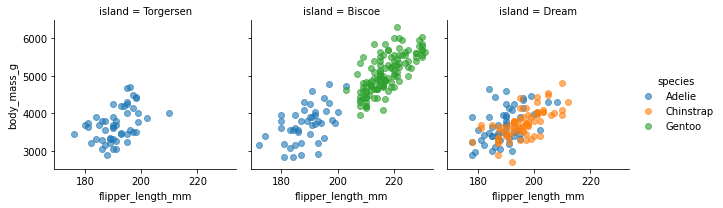

In [5]:
g = sns.FacetGrid(bird, col="island", hue="species")
g.map(plt.scatter, "flipper_length_mm", "body_mass_g", alpha=.6)
g.add_legend()
plt.show

**We want to quickly get an idea on the range of weights of the penguins by species and islands. Also, identify the concentration of the weight range.**

<function matplotlib.pyplot.show(close=None, block=None)>

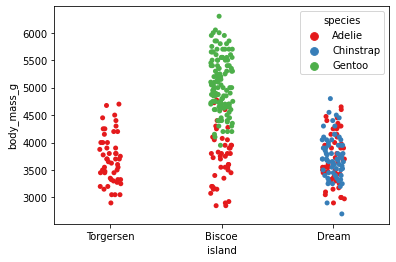

In [6]:
sns.stripplot(x="island", y="body_mass_g", hue="species", data=bird, palette="Set1")
plt.show

**Strip plot is helpful to get an insight as long as plots are not overcrowded with densely populated data points. In the island “Dream” points are densely populated in the plot, and it is a bit difficult to get meaningful information from it.**

**Swarmplot can help to visualise the range of weight of the penguins by species in each of the islands non-overlapping points.
In the below code, we mention similar information like above in strip plot.**

/opt/conda/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 21.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 8.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 13.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


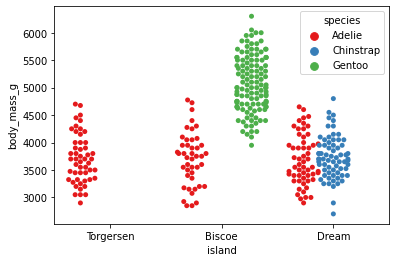

In [7]:
sns.swarmplot(x="island", y="body_mass_g", hue="species",data=bird, palette="Set1", dodge=True)
plt.show()

**Step 4: Next, we would like to understand the relationship between body mass and culmen length of penguins in each of the island based on their sex.
In the below code, in x and y parameter features between which we are interested in identifying, the relationship is mentioned. Hue is mentioned as “sex” as we want to learn the relation for male and female penguins separately.**

<function matplotlib.pyplot.show(close=None, block=None)>

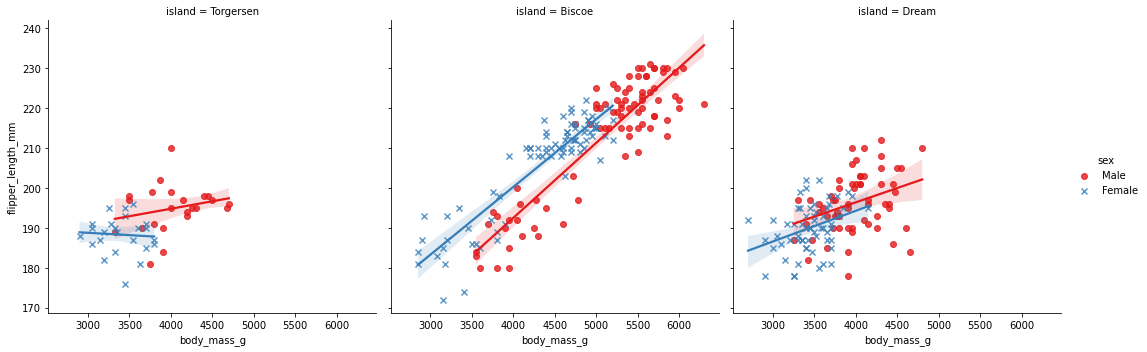

In [8]:
sns.lmplot(x="body_mass_g", y="flipper_length_mm", hue="sex", col="island", markers=["o", "x"], palette="Set1",data=bird)
plt.show

**In the case of heavily densely populated data points, we can further extend our exploratory data analysis by visualizing the body mass culmen relationship by male and female sex separately for each island.**

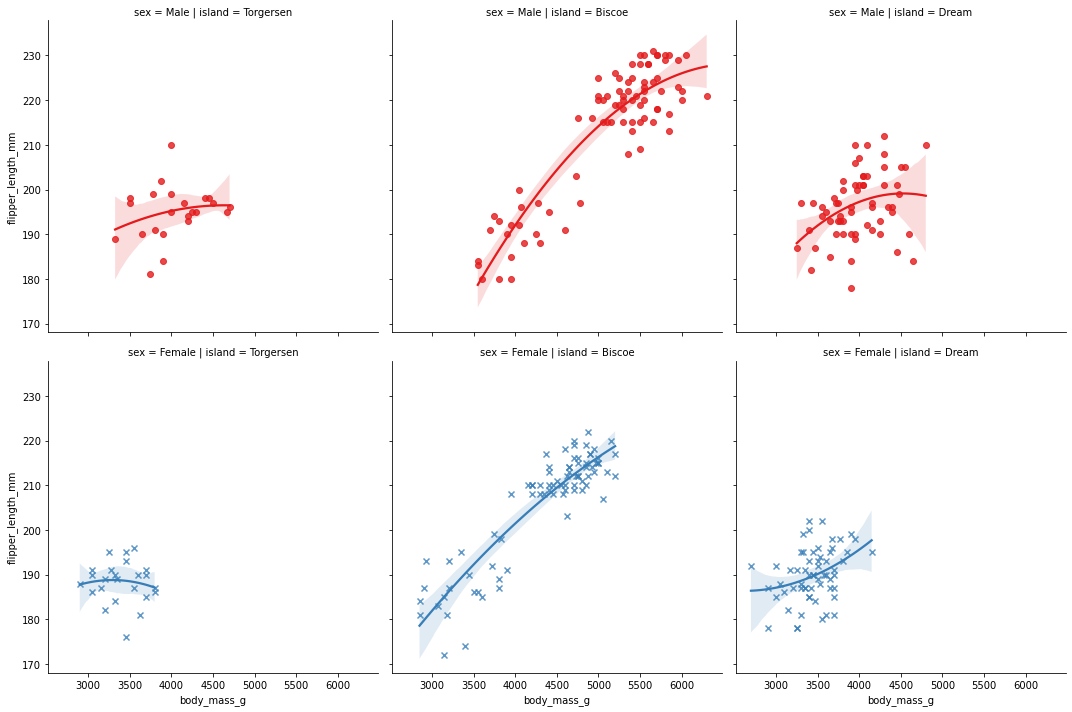

In [9]:
sns.lmplot(x="body_mass_g", y="flipper_length_mm", hue="sex", col="island",row="sex",order=2, markers=["o", "x"],palette="Set1",data=bird)
plt.show()

**Step 5: It helps to visualise a scatter plot and histogram side by side to get a holistic view of the spread of data points and also the frequency of observation at the same time. Joint plots are an efficient way to picture it. In the code below, x & y parameter is the feature between which we are trying to identify the relationship. As the data points are densely populated, hence we will plot a hexbin instead of a scatter plot. “Kind” parameter indicates the type of plot.**

<function matplotlib.pyplot.show(close=None, block=None)>

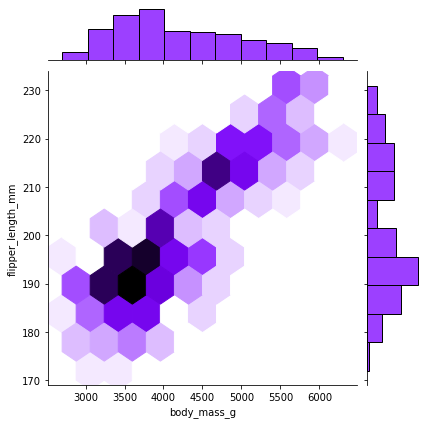

In [10]:
sns.set_palette("gist_rainbow_r")
sns.jointplot(x="body_mass_g", y="flipper_length_mm", kind="hex", data=bird)
plt.show

**Step 6: At last, we would like to get an overview of the spread and relationship among different features by island. Paitplots are very handy to visualise the scatter plot among different feature. The feature “island” is mentioned as the hue as we want to colour code the plot based on it.**

<function matplotlib.pyplot.show(close=None, block=None)>

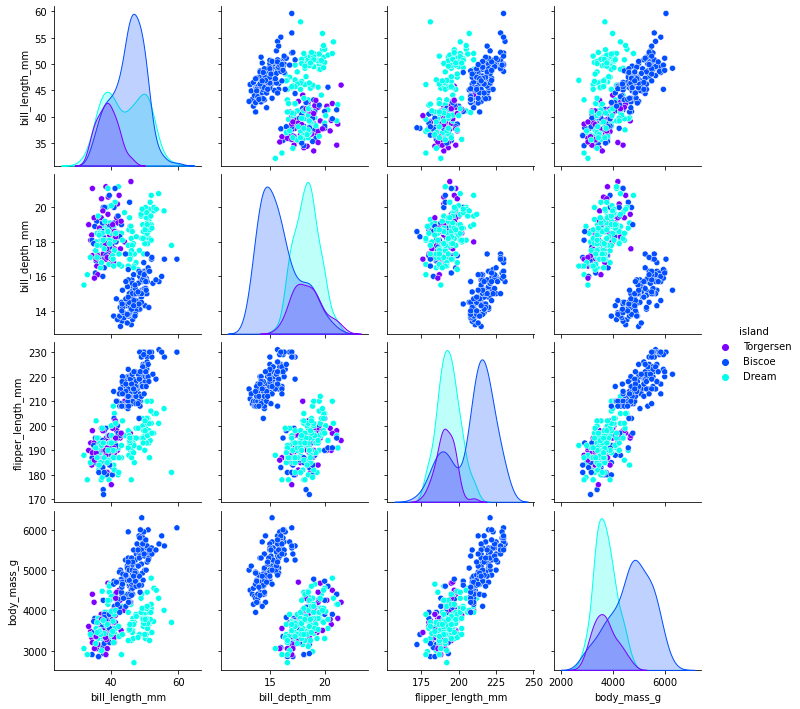

In [11]:
sns.pairplot(bird, hue="island")
plt.show